In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read csv w/out header
data = pd.read_csv('../data/Capital_Flats_2021-12-01_14_20_34.csv'
                   ,header=None
                   ,low_memory=False
                  )

# Forward fill the header name for each PowerScout
data.iloc[0] = data.T[0].fillna(method='ffill')

# Rename the 'nan' block
data.loc[0, 0] = 'Timestamp'

# Create the multi-index
data.columns = [list(data.iloc[0])
                ,list(data.iloc[1])
               ]

# Drop the first two rows because they're just the column names, and any column with only nulls
data = data[2:]

# Convert timestamp column to datetime format
data.Timestamp = pd.to_datetime(data.Timestamp.Timestamp, infer_datetime_format=True)

# Set Timestamp column as index, set columns to type 'float', rename index
data = data.set_index([('Timestamp', 'Timestamp')]).replace('-', np.nan).astype(float)
data.index.rename('Timestamp', inplace=True)

# Drop any column or row with all nulls
data = data.dropna(how='all', axis=1).dropna(how='all', axis=0)

# Slice to the two power systems we're monitoring and rename columns
gross_cols = ['PowerScout DPS126', 'PowerScout DPS121']
gross_power = data[gross_cols].rename(columns={'PowerScout DPS126' : 'solar'
                                               ,'PowerScout DPS121' : 'usage'
                                              }
                                     )

## Create our separate y-columns: solar pwr generated, buildling pwr used
idx = pd.IndexSlice

# Create DF with only Energy, resample hourly - keep just the last value (meter readings)
gross_energy = gross_power.loc[idx[:], idx[:, 'Total Energy (kWh)']
                              ].resample('1h').last()

# Create DF with only Power, resample hourly by summing
gross_pwr = gross_power.loc[idx[:], idx[:, 'True Power (kW)']
                           ].resample('1h').sum()

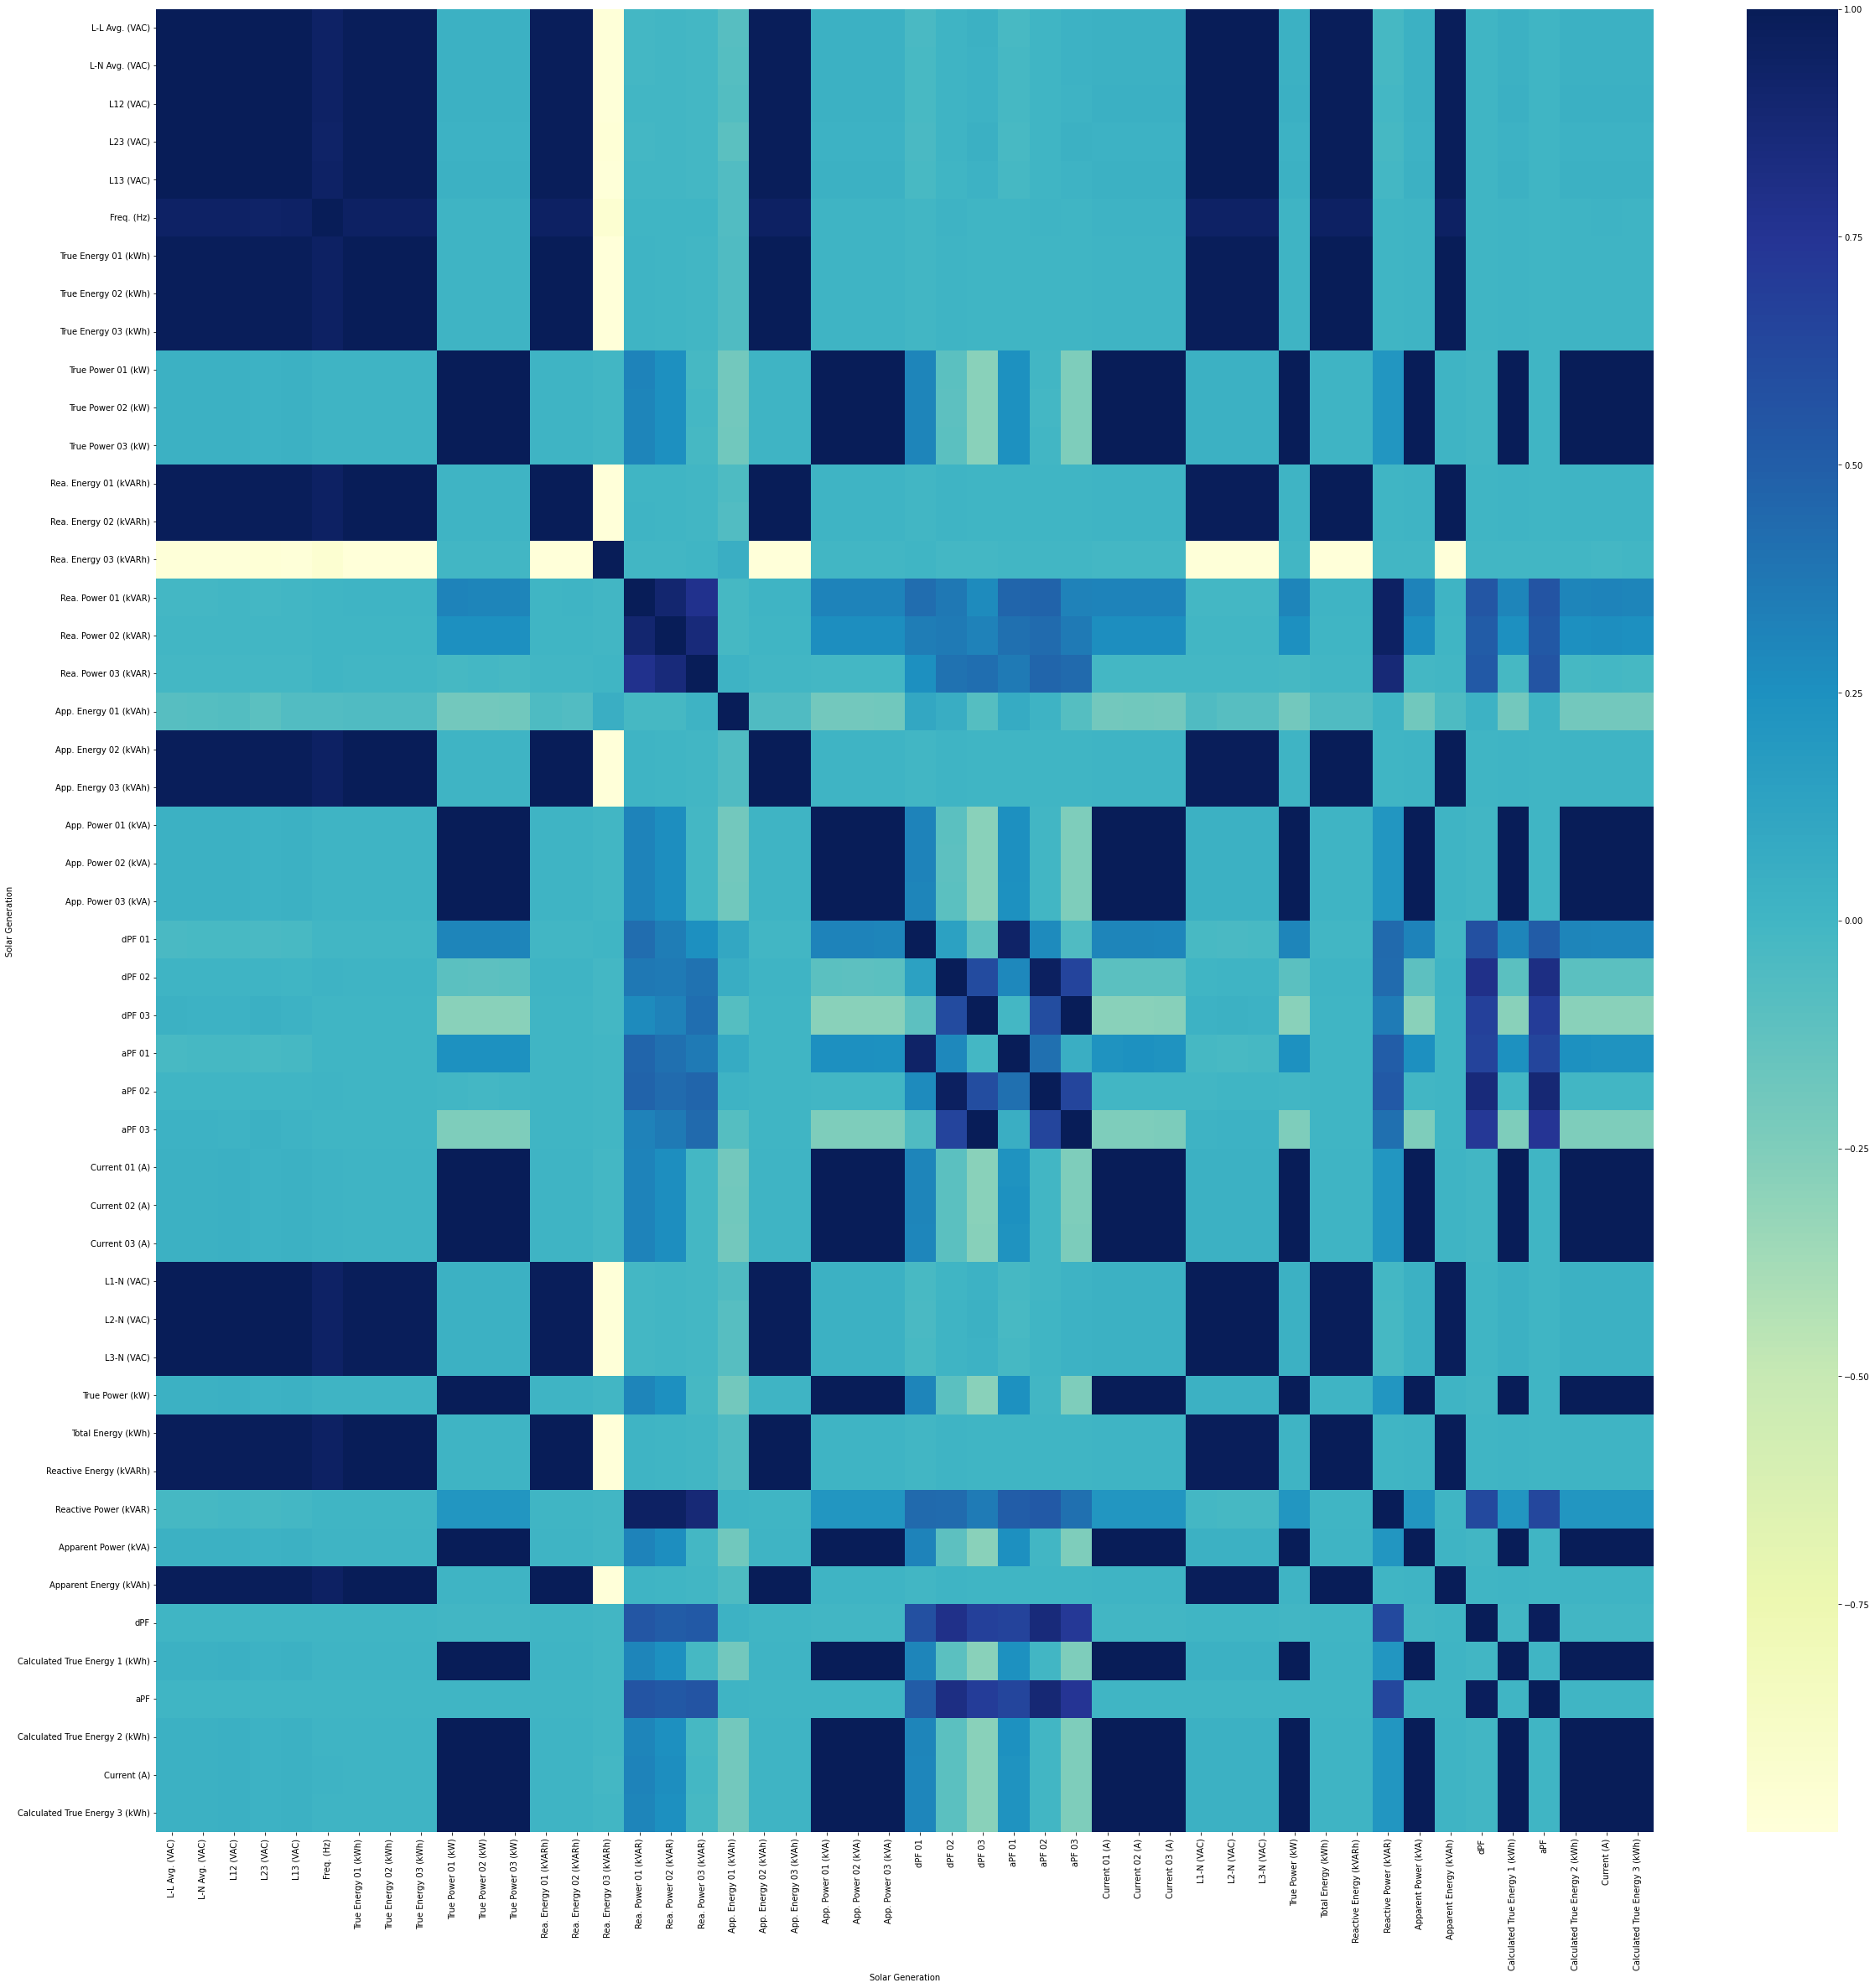

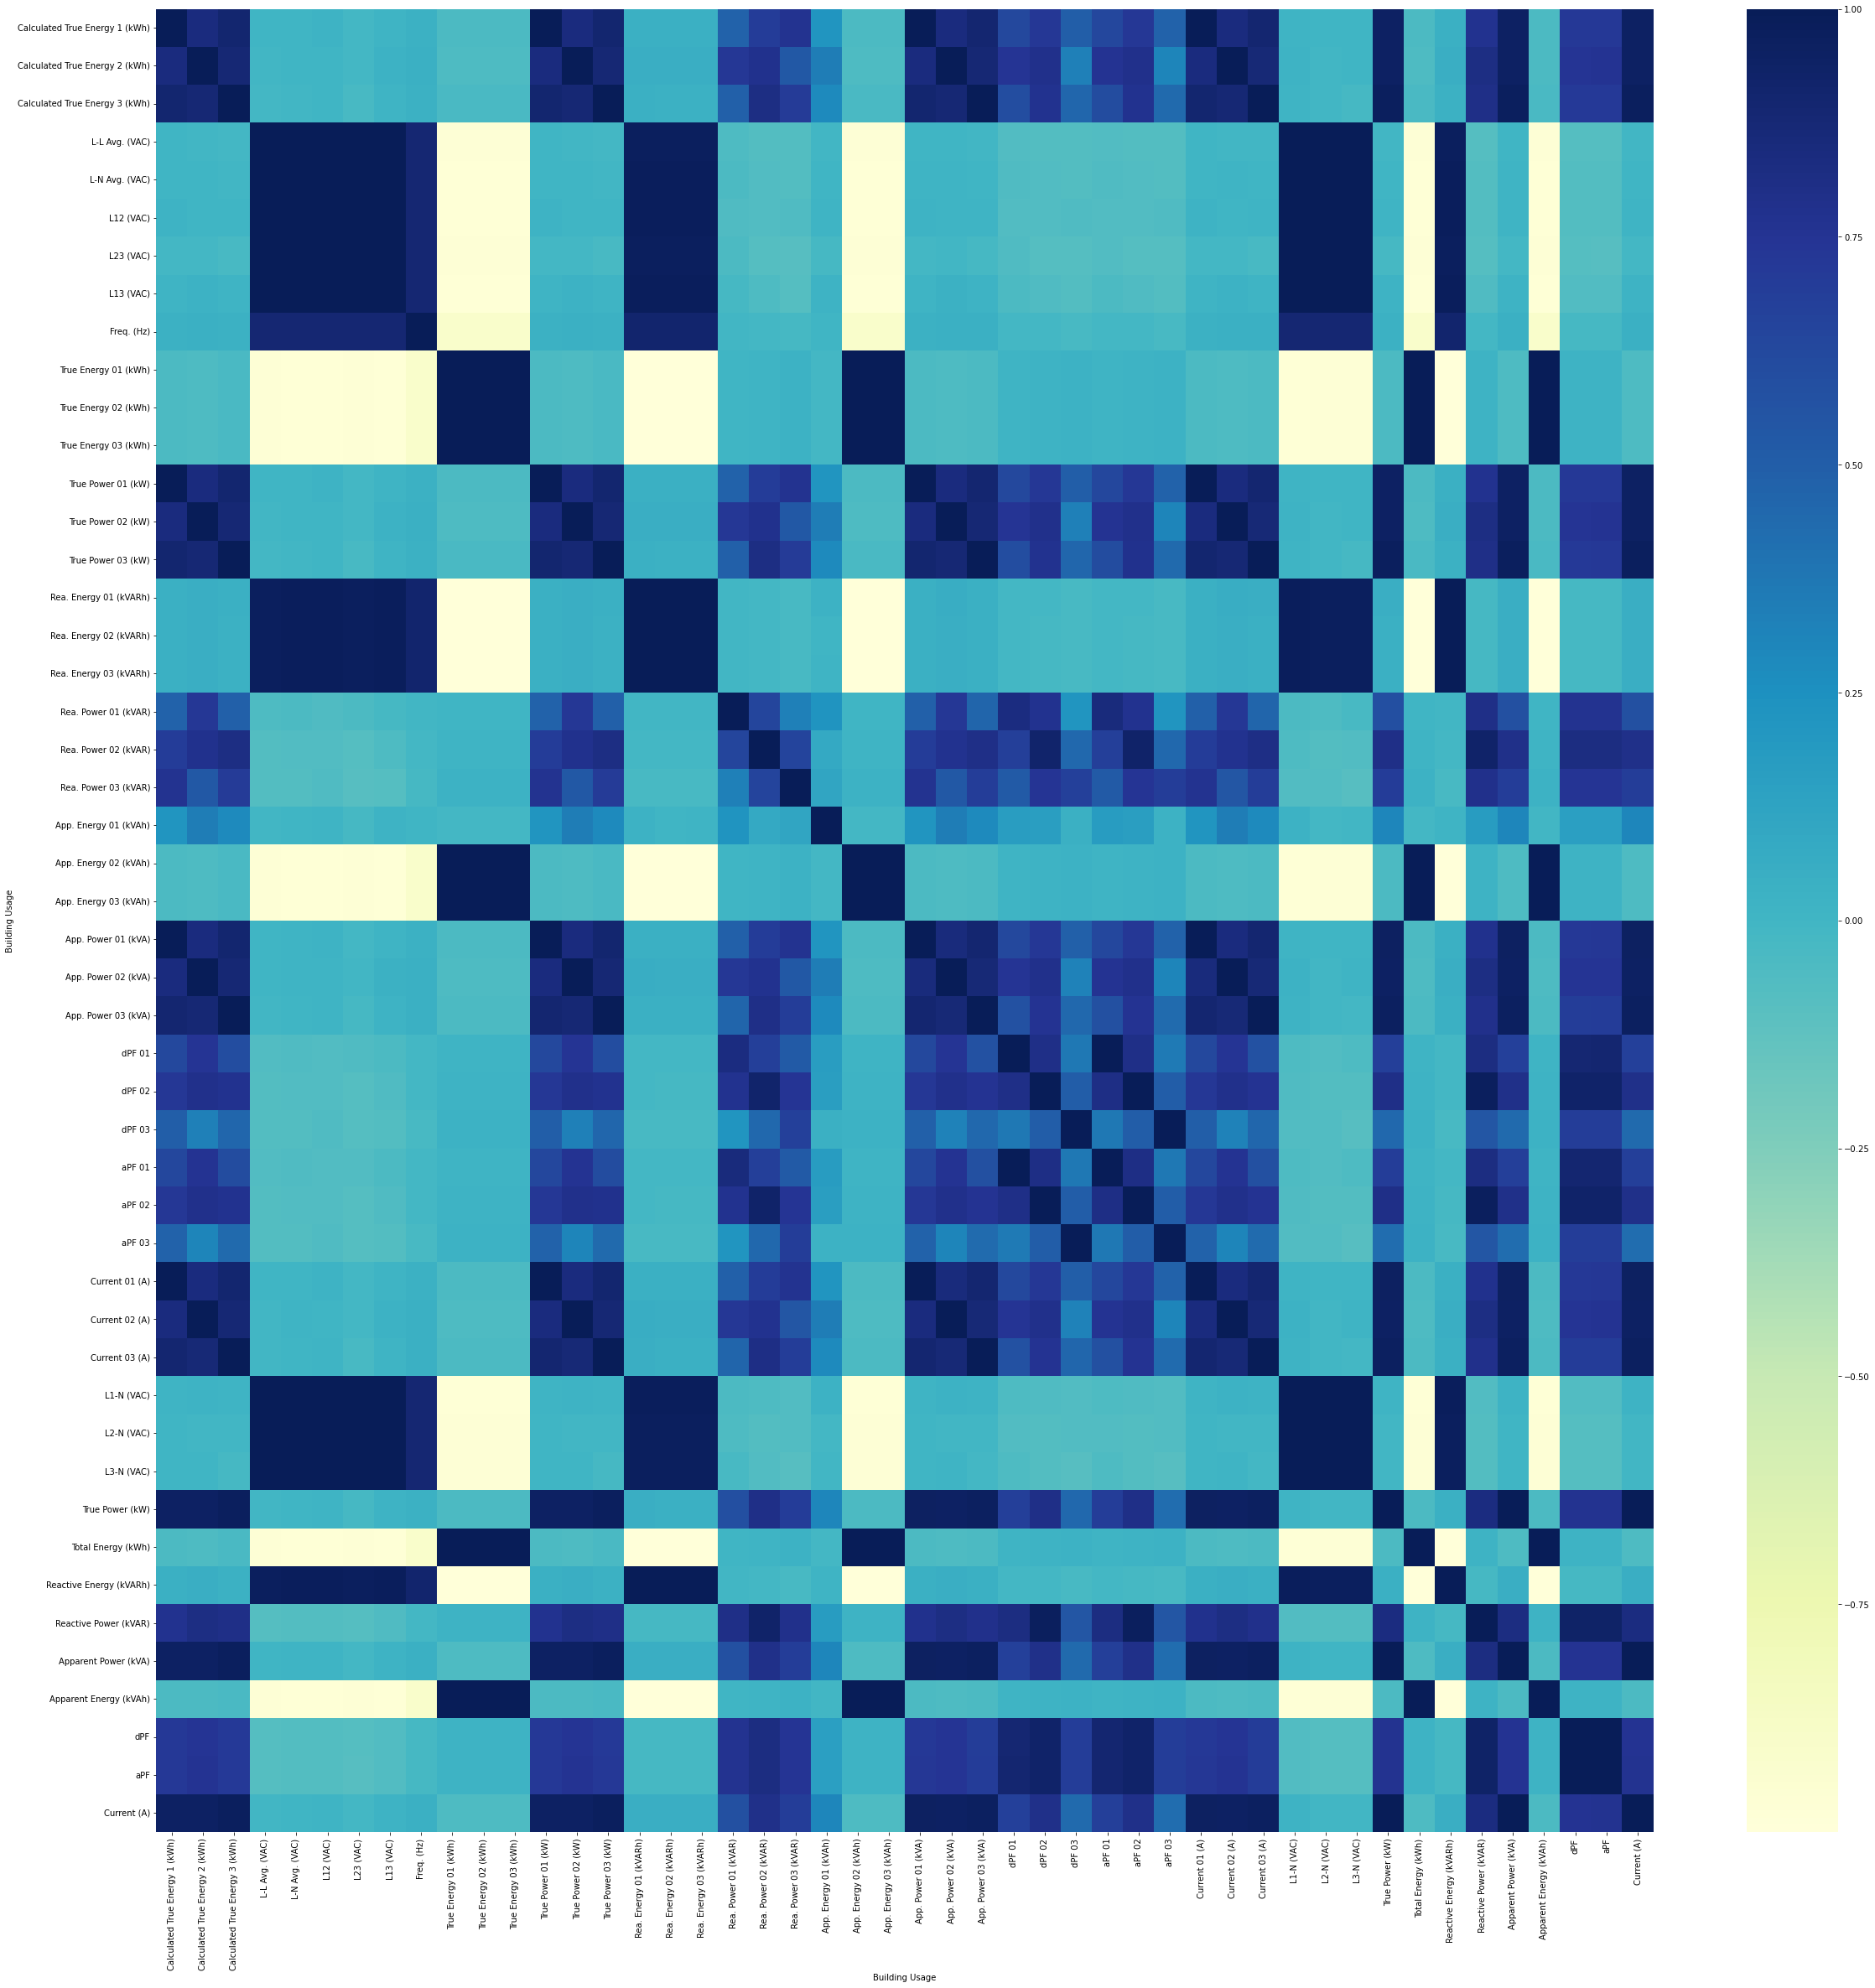

In [4]:
# Correlation Matrices - Solar and Build

# Solar Corr Matrix
plt.figure(figsize=(40, 40))
hm = sns.heatmap(gross_power.solar.corr(), cmap='YlGnBu')
hm.set(xlabel='Solar Generation'
       ,ylabel='Solar Generation'
      )

# Building Usage Corr Matrix
plt.figure(figsize=(40, 40))
hm = sns.heatmap(gross_power.usage.corr(), cmap='YlGnBu')
hm.set(xlabel='Building Usage'
       ,ylabel='Building Usage'
      )
plt.show()

In [5]:
# Cross correlation between Solar and Building Usage
gross_power.solar.corrwith(gross_power.usage)

L-L Avg. (VAC)                    0.715512
L-N Avg. (VAC)                    0.714292
L12 (VAC)                         0.713602
L23 (VAC)                         0.717484
L13 (VAC)                         0.712765
Freq. (Hz)                        0.678280
True Energy 01 (kWh)             -0.706977
True Energy 02 (kWh)             -0.706981
True Energy 03 (kWh)             -0.706973
True Power 01 (kW)                0.055395
True Power 02 (kW)               -0.008533
True Power 03 (kW)                0.075258
Rea. Energy 01 (kVARh)            0.706832
Rea. Energy 02 (kVARh)            0.707218
Rea. Energy 03 (kVARh)           -0.706727
Rea. Power 01 (kVAR)              0.049771
Rea. Power 02 (kVAR)              0.022082
Rea. Power 03 (kVAR)              0.037368
App. Energy 01 (kVAh)             0.875662
App. Energy 02 (kVAh)            -0.706982
App. Energy 03 (kVAh)            -0.706974
App. Power 01 (kVA)               0.052704
App. Power 02 (kVA)              -0.016108
App. Power 

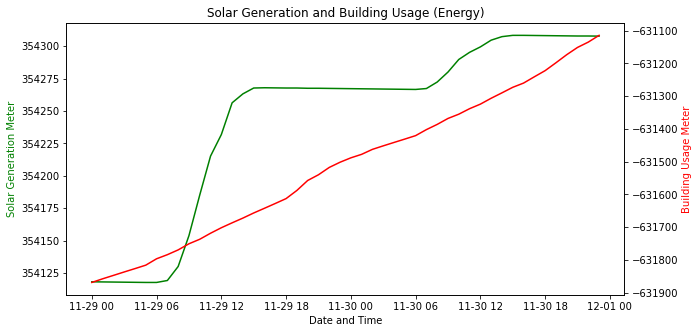

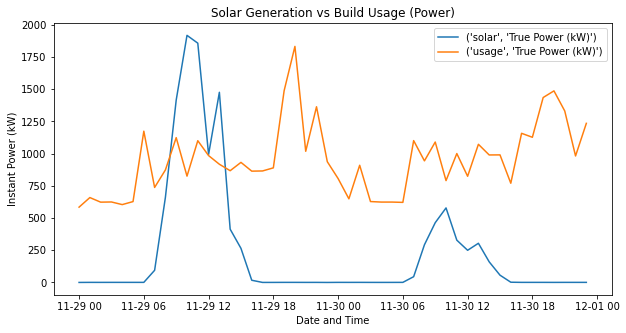

In [10]:
# Plot Energy - Solar Gen vs Building Usage
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Solar Generation and Building Usage (Energy)')

ax2 = ax1.twinx()
ax1.plot(gross_energy.solar
         ,color='g'
        )
ax2.plot(gross_energy.usage
         ,color='r'
        )

ax1.set_xlabel('Date and Time')
ax1.set_ylabel('Solar Generation Meter', color='g')
ax2.set_ylabel('Building Usage Meter', color='r')

plt.show()

# Plot Power - Solar Gen vs Building Usage
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Solar Generation vs Build Usage (Power)')

ax.plot(gross_pwr)

ax.set_xlabel('Date and Time')
ax.set_ylabel('Instant Power (kW)')
plt.legend(gross_pwr.columns)
plt.show()

In [ ]:
sns.pairplot(gross_power.solar)